## Laboratorio 2
- Diego Cordova 20212
- Andrea Lam 20102

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [4]:
dir_datos = './Data/Datos_Rotulos_Trafico/'

In [5]:
trayecto_test = os.path.join(dir_datos, 'prueba.p')
trayecto_train = os.path.join(dir_datos, 'entrenamiento.p')
trayecto_validation = os.path.join(dir_datos, 'validacion.p')

In [6]:
if os.path.exists(trayecto_test):
    print("El archivo prueba.p existe en la ruta especificada.")
else:
    raise Exception("El archivo prueba.p no existe en la ruta especificada.")

El archivo prueba.p existe en la ruta especificada.


In [7]:
if os.path.exists(trayecto_train):
    print("El archivo entrenamiento.p existe en la ruta especificada.")
else:
    raise Exception("El archivo entrenamiento.p no existe en la ruta especificada.")

El archivo entrenamiento.p existe en la ruta especificada.


### Obtener Data

In [8]:
import pickle

def get_data(filePath):
    with open(filePath, "rb") as archivo:
        objeto_cargado = pickle.load(archivo)

    y = objeto_cargado.pop('labels')
    x = objeto_cargado.pop('features')
    return x, y

X_train, y_train = get_data(os.path.join(dir_datos, 'entrenamiento.p'))
X_test, y_test = get_data(os.path.join(dir_datos, 'prueba.p'))
X_validation, y_validation = get_data(os.path.join(dir_datos, 'validacion.p'))

### Se validan las dimensiones de las imagenes

In [9]:
last = X_train[0].shape
diferencia = False

for img in X_train:
    if img.shape != last:
        diferencia = True

if diferencia:
    print('Hay dimensiones diferentes en las imagenes de entreno')

else:
    print('No hay dimensiones diferentes en las imagenes de entreno')

last = X_test[0].shape
diferencia = False

for img in X_test:
    if img.shape != last:
        diferencia = True

if diferencia:
    print('Hay dimensiones diferentes en las imagenes de testing')

else:
    print('No hay dimensiones diferentes en las imagenes de testing')

last = X_validation[0].shape
diferencia = False

for img in X_validation:
    if img.shape != last:
        diferencia = True

if diferencia:
    print('Hay dimensiones diferentes en las imagenes de Validacion')

else:
    print('No hay dimensiones diferentes en las imagenes de Validacion')


No hay dimensiones diferentes en las imagenes de entreno
No hay dimensiones diferentes en las imagenes de testing
No hay dimensiones diferentes en las imagenes de Validacion


### Normalizacion

In [10]:
X_train[0].min()

19

In [11]:
X_train[0].max()

113

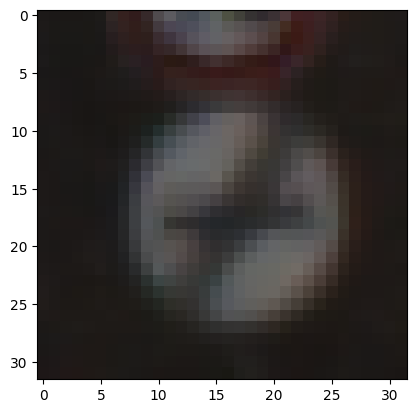

In [12]:
plt.imshow(X_train[0])

In [13]:
X_train = X_train / 255
X_test = X_test / 255
X_validation = X_validation / 255

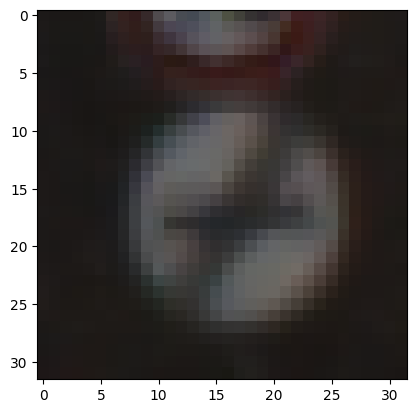

In [14]:
plt.imshow(X_train[0])

In [15]:
X_train.shape

(34799, 32, 32, 3)

### Definicion del modelo

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Conv3D

In [40]:
modelo = Sequential()

# Capa convolucional
modelo.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape = (32, 32, 3), activation = 'relu'))

# Capa pooling
modelo.add(MaxPool2D(pool_size = (2, 2)))

# Capa convolucional
modelo.add(Conv2D(filters = 16, kernel_size = (5, 5), input_shape = (32, 32, 3), activation = 'relu'))

# Capa pooling
modelo.add(MaxPool2D(pool_size = (2, 2)))

# Capa aplanada
modelo.add(Flatten())

# Hidden layers
modelo.add(Dense(120, activation = 'relu'))
modelo.add(Dense(84, activation = 'relu'))

# Clasificadora (softmax)
modelo.add(Dense(43, activation='softmax'))

In [41]:
import tensorflow as tf
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

modelo.build((32, 32, 3))
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        12816     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

### Entreno del modelo

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
detencion_temprana = EarlyStopping(monitor = 'val_loss', patience = 2)

modelo.fit(
    X_train,
    y_train,
    epochs = 10,
    validation_data = (X_test, y_test),
    callbacks = [detencion_temprana]
)

Epoch 1/10
1088/1088 [==============================] - 35s 30ms/step - loss: 1.1268 - accuracy: 0.6864 - val_loss: 0.6436 - val_accuracy: 0.8613
Epoch 2/10
1088/1088 [==============================] - 39s 36ms/step - loss: 0.2024 - accuracy: 0.9447 - val_loss: 0.5404 - val_accuracy: 0.8771
Epoch 3/10
1088/1088 [==============================] - 36s 33ms/step - loss: 0.1118 - accuracy: 0.9696 - val_loss: 0.5697 - val_accuracy: 0.9008
Epoch 4/10
1088/1088 [==============================] - 36s 33ms/step - loss: 0.0820 - accuracy: 0.9777 - val_loss: 0.5540 - val_accuracy: 0.9125


### Testing

,loss,accuracy,val_loss,val_accuracy
0,1.126846,0.686370,0.643559,0.861283
1,0.202421,0.944654,0.540417,0.877118
2,0.111758,0.969626,0.569740,0.900792
3,0.082010,0.977701,0.553965,0.912510


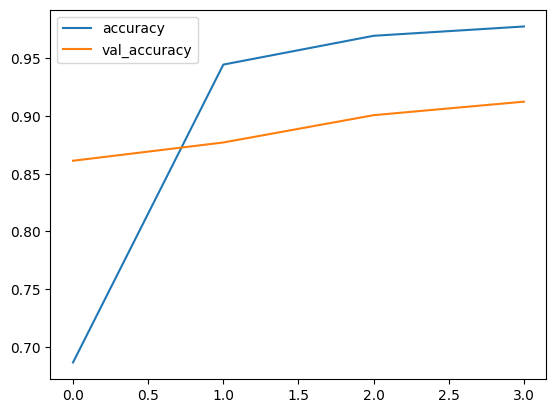

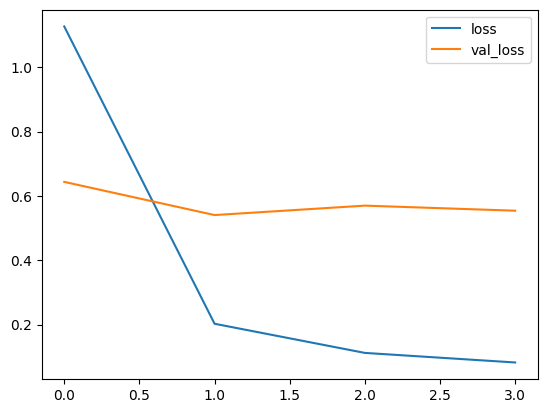

In [43]:
modelo.metrics_names
metricas = pd.DataFrame(modelo.history.history)
metricas[['accuracy', 'val_accuracy']].plot()
metricas[['loss', 'val_loss']].plot()
metricas.head()

In [44]:
print(modelo.metrics_names)
print(modelo.evaluate(X_test, y_test, verbose = 0))

['loss', 'accuracy']
[0.5539652705192566, 0.9125099182128906]


In [45]:
import numpy as np
from sklearn.metrics import classification_report

# Realizar predicciones con el modelo
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Calcular métricas de evaluación
report = classification_report(y_test, y_pred_classes)
print(report)

395/395 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.94      0.75      0.83        60
           1       0.88      0.97      0.93       720
           2       0.91      0.93      0.92       750
           3       0.81      0.98      0.88       450
           4       0.95      0.93      0.94       660
           5       0.90      0.81      0.86       630
           6       0.95      0.82      0.88       150
           7       0.91      0.84      0.87       450
           8       0.94      0.92      0.93       450
           9       0.92      0.97      0.95       480
          10       0.99      0.96      0.97       660
          11       0.89      0.87      0.88       420
          12       0.99      0.93      0.96       690
          13       0.99      0.99      0.99       720
          14       0.99      0.96      0.98       270
          15       0.92      0.95      0.93       210
          16       1.00   